# Homework 09

**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

**Note**: The expected figures are provided so you can check your solutions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.linalg as la

**1**. (20 points)

Find the gradient and Hessian for the following equation

$$
f(x, y) = 1 + 2x + 3y + 4x^2 + 2xy + y^2
$$

- Plot the contours of this function using `matplotlib` in the box $-10 \le x \le 10$ and $-10 \le y \le 10$ using a $100 \times 100$ grid. 
- Then plot the gradient vectors using the `quiver` function on top of the contour plot using a $10 \times 10$ grid. Are the gradients orthogonal to the contours?

Hint: Use `numpy.meshgrid`, `matplotlib.contour` and `matplotllib.quiver`.

![img](7_1.png)

First, we should analytical expressions for the gradient and Hessian:

$\nabla f = \begin{pmatrix} 2 + 8x + 2y \\ 3 + 2x + 2y \end{pmatrix}$

$H = \begin{pmatrix} 8 & 2 \\ 2 & 2 \end{pmatrix}$

Next, we can define functions for f, the gradient of f, and the Hessian of f (which we don't actually use in this part)

In [2]:
def f(x, y):
    """Returns value of f(x, y) at specified coordinates"""
    return 1 + 2*x + 3*y + 4*x**2 + 2*x*y + y**2

In [3]:
def grad(x, y):
    """Returns gradient of f(x, y) at specified coordinates"""
    return np.array([2 + 8*x + 2*y, 3 + 2*x + 2*y])

In [4]:
def hess(x, y):
    """Returns Hessian of f(x, y) at specified coordinates, which is constant"""
    return np.array([[8, 2], [2, 2]])

Lastly, we can generate the desired plot

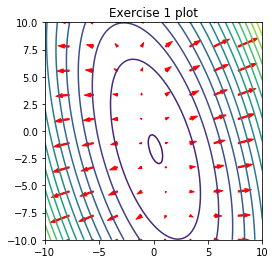

In [5]:
# Plot contours
x = y = np.linspace(start = -10, stop = 10, num = 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z, 15)

# Plot gradient arrows
x_quiv = y_quiv = np.linspace(start = -10, stop = 10, num = 10)
X_quiv, Y_quiv = np.meshgrid(x_quiv, y_quiv)
plt.quiver(X_quiv, Y_quiv, grad(X_quiv, Y_quiv)[0], grad(X_quiv, Y_quiv)[1], color = 'red', \
           linewidths = 1, edgecolors = 'r')

# Format plot
plt.axis('square');
plt.title('Exercise 1 plot');

**2**. (30 points)

This exercise is about using Newton's method to find the cube roots of unity - find $z$ such that $z^3 = 1$. From the fundamental theorem of algebra, we know there must be exactly 3 complex roots since this is a degree 3 polynomial.

We start with Euler's equation
$$
e^{ix} = \cos x + i \sin x
$$

Raising $e^{ix}$ to the $n$th power where $n$ is an integer, we get from Euler's formula with $nx$ substituting for $x$
$$
(e^{ix})^n = e^{i(nx)} = \cos nx + i \sin nx
$$

Whenever $nx$ is an integer multiple of $2\pi$, we have
$$
\cos nx + i \sin nx = 1
$$

So
$$
e^{2\pi i \frac{k}{n}}
$$
is a root of 1 whenever $k/n = 0, 1, 2, \ldots$.

So the cube roots of unity are $1, e^{2\pi i/3}, e^{4\pi i/3}$. 

![img](7_2.png)

While we can do this analytically, the idea is to use Newton's method to find these roots, and in the process, discover some rather perplexing behavior of Newton's method.

Newton's method for functions of complex variables - stability and basins of attraction. (30 points)

1. Write a function with the following function signature `newton(z, f, fprime, max_iter=100, tol=1e-6)` where
    - `z` is a starting value (a complex number e.g.  ` 3 + 4j`)
    - `f` is a function of `z`
    - `fprime` is the derivative of  `f`
The function will run until either max_iter is reached or the absolute value of the Newton step is less than tol. In either case, the function should return the number of iterations taken and the final value of `z` as a tuple (`i`, `z`). 

2. Define the function `f` and `fprime` that will result in Newton's method finding the cube roots of 1. Find 3 starting points that will give different roots, and print both the start and end points. 

Write the following two plotting functions to see some (pretty) aspects of Newton's algorithm in the complex plane.

3. The first function `plot_newton_iters(f, fprime, n=200, extent=[-1,1,-1,1], cmap='hsv')` calculates and stores the number of iterations taken for convergence (or max_iter) for each point in a 2D array. The 2D array limits are given by `extent` - for example, when `extent = [-1,1,-1,1]` the corners of the plot are `(-i, -i), (1, -i), (1, i), (-1, i)`. There are `n` grid points in both the real and imaginary axes. The argument `cmap` specifies the color map to use - the suggested defaults are fine. Finally plot the image using `plt.imshow` - make sure the axis ticks are correctly scaled. Make a plot for the cube roots of 1.

![img](7_2A.png)

4. The second function `plot_newton_basins(f, fprime, n=200, extent=[-1,1,-1,1], cmap='jet')` has the same arguments, but this time the grid stores the identity of the root that the starting point converged to. Make a plot for the cube roots of 1 - since there are 3 roots, there should be only 3 colors in the plot.

![img](7_2B.png)

Define `f`, `fprime`, and the `newton` method

In [6]:
f = lambda x: x**3 - 1
fprime = lambda x: 3*x**2

In [7]:
def newton(z, f, fprime, max_iter = 100, tol = 1e-6):
    """Perform Newton's method to find root from given starting place"""
    
    # Initialize iteration counter
    it = 0
    
    # Improve guess until max iterations are reached OR magnitude of f(z) is less than tolerance
    while np.linalg.norm(f(z)) > tol and it < max_iter:
        z -= f(z) / fprime(z)
        it += 1
    
    # Return iteration number and root
    return(it, z)

Next, we find the 3 roots, given 3 different starting points

In [8]:
z1 = 3 + 4j
roots = [newton(z = z1, f = f, fprime = fprime)]
z2 = 4j
roots.append(newton(z = z2, f = f, fprime = fprime))
z3 = -4j
roots.append(newton(z = z3, f = f, fprime = fprime))
roots

[(15, (0.9999998406627114+1.9855836191548775e-08j)),
 (8, (-0.4999999999965685+0.8660254037852586j)),
 (8, (-0.4999999999965685-0.8660254037852586j))]

Now, we can get to work on the `plot_newton_iters` function

In [9]:
def plot_newton_iters(f, fprime, n=200, extent=[-1,1,-1,1], cmap='hsv'):
    """Plots number of iterations for convergence for each point in a 2D array"""
    
    # Define boundaries on real and imaginary lines
    imag_lin = np.linspace(start = extent[0] * 1j, stop = extent[1] * 1j, num = n)
    real_lin = np.linspace(start = extent[2], stop = extent[3], num = n)
    
    # Create meshgrid
    R, I = np.meshgrid(real_lin, imag_lin)
    f_input = R + I
    
    # Calculate number of iterations at each point on meshgrid, and display result
    iters = np.array(list(map(lambda x: newton(x, f, fprime)[0], f_input.ravel()))).reshape(n, n)
    plt.imshow(iters, cmap = cmap);

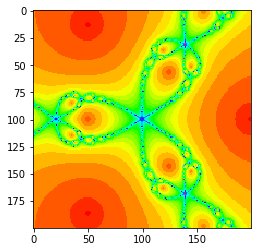

In [10]:
plot_newton_iters(f, fprime)

Lastly, let's work on `plot_newton_basins`

In [11]:
def plot_newton_basins(f, fprime, n=200, extent=[-1,1,-1,1], cmap='jet'):
    """Plots root for each point in a 2D array"""
    
    # Define boundaries on real and imaginary lines
    imag_lin = np.linspace(start = extent[0] * 1j, stop = extent[1] * 1j, num = n)
    real_lin = np.linspace(start = extent[2], stop = extent[3], num = n)
    
    # Create meshgrid
    R, I = np.meshgrid(real_lin, imag_lin)
    f_input = R + I
    
    # Calculate number of iterations at each point on meshgrid, and display result
    iters = np.array(list(map(lambda x: newton(x, f, fprime)[1], f_input.ravel()))).reshape(n, n)
    iters = iters.real + iters.imag # Need to extract values such that they can be plotted (but still differentiated)
    plt.imshow(iters, cmap = cmap);

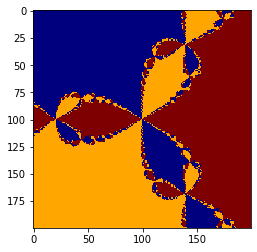

In [12]:
plot_newton_basins(f, fprime)

**3**. (20 points)

Consider the following function on $\mathbb{R}^2$:

$$
f(x_1,x_2) = -x_1x_2e^{-\frac{(x_1^2+x_2^2)}{2}}
$$

- Find the minimum under the constraint 
$$g(x) = x_1^2+x_2^2 \leq 10$$
and 
$$h(x) = 2x_1 + 3x_2 = 5$$ using `scipy.optimize.minimize`.
- Plot the function contours using `matplotlib`, showing the constraints $g$ and $h$ and indicate the constrained minimum with an `X`.

![img](7_3.png)

First, we use `scipy.optimize.minimize` to find the point of minimum value and display the result below

In [13]:
f = lambda x: -x[0] * x[1] * np.exp(-0.5 * (x[0]**2 + x[1]**2))
cons = ({'type': 'ineq', 'fun': lambda x: x[0]**2 + x[1]**2 + 10},
        {'type': 'eq', 'fun': lambda x: 2*x[0] + 3*x[1] - 5})
res = minimize(f, [0,0], constraints=cons)
min_val = res.x
min_val

array([1.00001624, 0.99998917])

Next, we generate the requested plot

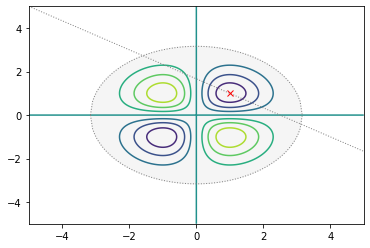

In [14]:
# Generate contours
f = lambda x1, x2: -x1 * x2 * np.exp(-0.5 * (x1**2 + x2**2))
x1 = x2 = np.linspace(-5, 5, 500)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
plt.contour(X1, X2, Z, 7);

# Plot linear constraint
h = (5 - 2*x1) / 3
plt.plot(x1, h, linestyle = ':', color = 'gray', linewidth = 1);

# Plot inequality constraint
tol = 1e-6 # Useful for avoiding rounding error that lead to sqrt of negative number
x1_small = np.linspace(-np.sqrt(10) + tol, np.sqrt(10) - tol, 100)
g = np.sqrt(10 - x1_small**2)
plt.plot(x1_small, g, linestyle = ':', color = 'gray', linewidth = 1);
plt.plot(x1_small, -g, linestyle = ':', color = 'gray', linewidth = 1);
plt.fill(x1_small, g, color = 'whitesmoke');
plt.fill(x1_small, -g, color = 'whitesmoke');

# Plot minimum
plt.plot(min_val[0], min_val[1], 'x', c = 'red');

**4** (30 points)

Find solutions to $x^3 + 4x^2 -3 = x$. 

- Write a function to find brackets, assuming roots are always at least 1 unit apart and that the roots lie between -10 and 10
- For each bracket, find the enclosed root using
    - a bisection method
    - Newton-Raphson (no guarantee to stay within brackets)
- Use the end points of the bracket as starting points for the bisection methods and the midpoint for Newton-Raphson.
- Use the companion matrix and characteristic polynomial to find the solutions
- Plot the function and its roots (marked with a circle) in a window just large enough to contain all roots.

Use a tolerance of 1e-6.

![img](7_4.png)

First, we write a function to find brackets, assuming roots are always at least 1 unit apart and that the roots lie between -10 and 10. Then, we test the function on $x^3 + 4x^2 - 3 = x$

In [15]:
def find_brackets(f):
    """Returns brackets of a given function, assuming roots are always at least 1 unit apart and that roots lie 
    between -10 and 10"""
    
    # Initialize output, and set bounds for root-finding
    bracket_store = []
    left_endpoint = -10
    right_endpoint = 10
    
    # Set initial guesses
    left_bound = left_endpoint
    right_bound = left_endpoint + 1
    
    # Iteratively find all brackets
    while right_bound <= right_endpoint:
        if f(left_bound) * f(right_bound) <= 0:
            bracket_store.append([left_bound, right_bound])
        left_bound += 1
        right_bound += 1

    # Return result
    return bracket_store

In [16]:
# Test `find_brackets` on function from exercise
f = lambda x: x**3 + 4*x**2 - x - 3
brackets = find_brackets(f)
brackets

[[-5, -4], [-1, 0], [0, 1]]

Let's define a bisection function that returns a root, given a function and bracket

In [17]:
def bisection(f, lower, upper, tol = 1e-6):
    """Returns root of f between lower and upper bounds up to specified tolerance using bisection"""
    
    # Check to see if either end of the bracket is actually a root
    if np.abs(f(lower)) <= tol:
        return lower
    if np.abs(f(upper)) <= tol:
        return upper
    
    # Initialize midpoint, and check for immediate solution
    mid = (lower + upper) / 2
    
    # Perform bisection
    while np.abs(f(mid)) > tol:
        if f(lower) * f(mid) < 0:
            upper = mid
        else:
            lower = mid
        mid = (lower + upper) / 2
    
    # Return result
    return mid

Now, let's test the `bisection` function

In [18]:
# Initialize result
roots = []

# Find roots
for bracket in brackets:
    roots.append(bisection(f, lower = bracket[0], upper = bracket[1]))

# Display result
np.round(roots, 8)

array([-4.06443453, -0.82751989,  0.89195442])

Equivalently, we can define a Newton-Raphson function that returns a root, given a function and bracket. We'll also have to define a gradient function for f

In [19]:
# Define gradient
grad = lambda x: 3*x**2 + 8*x - 1

# Newton-Raphson function
def NR(f, grad, midpoint, tol = 1e-6):
    """Returns root of f between lower and upper bounds up to specified tolerance using Newton-Raphson method"""
    
    # Iteratively improve estimate up to tolerance
    while np.abs(f(midpoint)) > tol:
        midpoint -= f(midpoint) / grad(midpoint)
    
    # Return root
    return midpoint

Now, let's test the `NR` function

In [20]:
# Initialize result
roots = []

# Find roots
for bracket in brackets:
    roots.append(NR(f, grad, midpoint = (bracket[0] + bracket[1]) / 2))

# Display result
np.round(roots, 8)

array([-4.06443453, -0.82752006,  0.89195444])

Next, we can create a companion matrix and find its eigenvalues, which are equal to the roots of the polynomial.

In [21]:
C = np.array([[-4, 1, 3],
             [1, 0, 0],
             [0, 1, 0]])
roots = la.eigvals(C).real
roots

array([-4.06443453,  0.89195444, -0.82751991])

We can confirm there values with the `np.roots` function

In [22]:
np.roots(np.poly1d([1, 4, -1, -3]))

array([-4.06443453,  0.89195444, -0.82751991])

Lastly, we plot the function, as requested

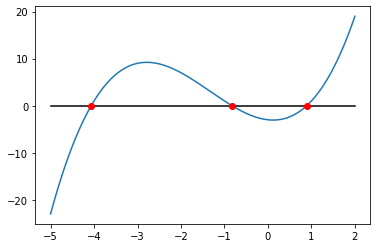

In [23]:
x = np.linspace(-5, 2, 500)
y = f(x)
plt.plot(x, y);
plt.plot(x, np.zeros(len(x)), color = 'k');
plt.plot(roots, np.zeros(len(roots)), 'ro');